In [1]:
import cv2, czifile
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import io,color, measure,filters

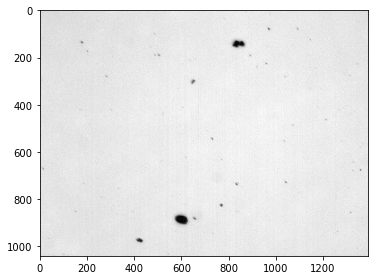

In [7]:
#ZEISS files:
#img = czifile.imread('C:/Users/juanr/Documents/mediciones_ZEISS/15x15-Experiment.czi')
#img = img[0,0,:,:,0]
#img= img[0:1000,0:1000]

#OLYMPUS metalographic microscope
img = io.imread('C:/Users/juanr/Documents/mediciones microscopio metalografico/amarillo_11.tif')


def normalize(arr):
    arr_min = arr.min()
    arr_max = arr.max()
    return (arr - arr_min) / (arr_max - arr_min)

img = normalize(img[:,:,0]); #tif data type is uint16 -> normalization converts data to doubles.
#0 index takes just one channel of the tuple (R,G,B)

io.imshow(img,cmap='gray')

In [3]:
pixels_to_microns = 0.440 #1pixel=0.586 microns en el zeis

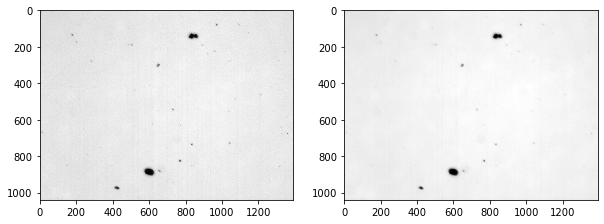

In [8]:
img_denoised = filters.median(img,selem=np.ones((10,10))) #some cleaning

#plot to compare crude_img vs denoised_img:
f,(ax0,ax1) = plt.subplots(1,2,figsize=(10,5))
ax0.imshow(img,cmap='gray')
ax1.imshow(img_denoised,cmap='gray')

(array([3.50000e+01, 1.11000e+02, 2.44000e+02, 3.00000e+02, 1.93000e+02,
        1.47000e+02, 1.18000e+02, 8.80000e+01, 7.20000e+01, 7.30000e+01,
        5.70000e+01, 5.90000e+01, 6.00000e+01, 4.80000e+01, 4.70000e+01,
        4.50000e+01, 4.80000e+01, 5.70000e+01, 5.20000e+01, 4.90000e+01,
        3.10000e+01, 3.90000e+01, 4.40000e+01, 3.90000e+01, 3.80000e+01,
        4.20000e+01, 4.10000e+01, 3.30000e+01, 3.20000e+01, 3.50000e+01,
        3.10000e+01, 3.50000e+01, 3.20000e+01, 4.30000e+01, 3.80000e+01,
        4.10000e+01, 4.00000e+01, 4.20000e+01, 3.20000e+01, 3.60000e+01,
        3.30000e+01, 4.20000e+01, 3.90000e+01, 4.30000e+01, 5.60000e+01,
        4.30000e+01, 7.10000e+01, 4.20000e+01, 4.60000e+01, 5.30000e+01,
        5.00000e+01, 5.10000e+01, 6.40000e+01, 5.90000e+01, 6.80000e+01,
        5.80000e+01, 7.00000e+01, 4.90000e+01, 6.60000e+01, 7.20000e+01,
        7.30000e+01, 8.10000e+01, 7.80000e+01, 7.70000e+01, 9.20000e+01,
        9.00000e+01, 1.05000e+02, 1.03000e+02, 1.21

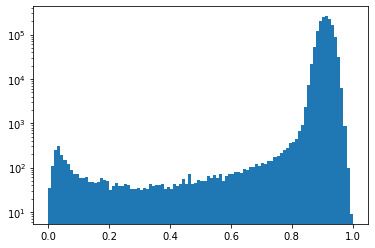

In [9]:
#We search for a threshold in intensity to look for defects.
plt.hist(img.flatten(),bins=100,log=True) #flatten makes the 2d matrix a 1d numpy array

In [68]:
from skimage.util import img_as_ubyte
img = img_as_ubyte(img)
ret,thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

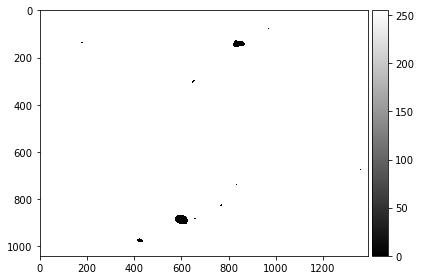

In [69]:
io.imshow(thresh,cmap='gray')

In [70]:
#clean up the image
kernel=np.ones((3,3),np.uint8)

In [71]:
eroded = cv2.erode(thresh,kernel,iterations=1)

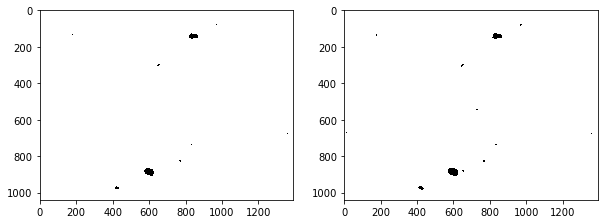

In [72]:
f,(ax0,ax1) = plt.subplots(1,2,figsize=(10,5))
ax0.imshow(thresh,cmap='gray')
ax1.imshow(eroded,cmap='gray')

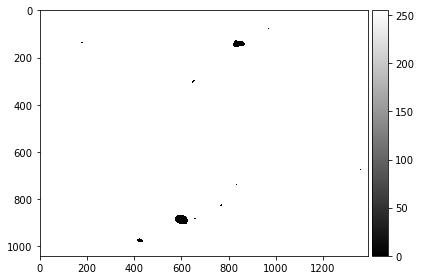

In [73]:
dilated = cv2.dilate(eroded,kernel,iterations=1)
io.imshow(dilated,cmap='gray')

In [74]:
mask = dilated==255

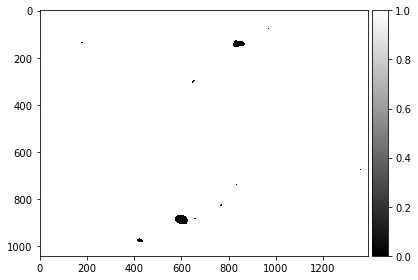

In [76]:
io.imshow(mask,cmap='gray')

In [77]:
s=[[1,1,1],[1,1,1],[1,1,1]]

In [78]:
label_mask,num_labels = ndimage.label(mask,structure=s)

In [87]:
img2 = color.label2rgb(label_mask,bg_label=0)

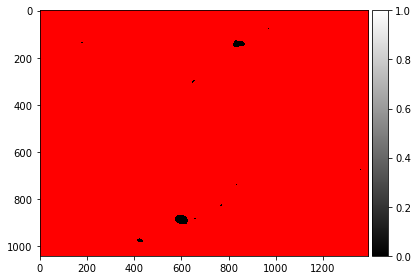

In [88]:
io.imshow(img2,cmap='gray')

In [94]:
clusters = measure.regionprops(label_mask,img)
clusters

In [97]:
print(clusters[0].perimeter)

5470.582827844797
